# Example of propagation of the injected flux for a certain source model

import libraries

In [1]:
# Trick to autoreload modules automatically for development
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

from combined_fit import spectrum as sp
from combined_fit import constant
from combined_fit import mass
from combined_fit import tensor as ts
from combined_fit import xmax_distr
from combined_fit import draw

In [3]:
plt.rcParams.update({'font.size': 14,'legend.fontsize': 12}) #selecting font and size

Parameters choice at the source (gamma and logRcut), redshift range (zmin, zmax) that has to be read in the tensor and thresold energy, from which the deviance is performed

In [4]:
    #Spectral parameters
    logRcut = 18.25
    gamma = -1.12
    E_times_k=  np.dot([0.05,  0.36,  0.40,  0.18, 0.01], 3.7150108e+46)  # erg per solar mass

    model="Sibyll2.3d"
    E_th = 18.75 # Compute the deviance from this energy


Chosing evolution of the source (SFR or flat at this stage) and computing weights for the injected spectra

In [5]:
#Evolution
SFRd = ts.Load_evol() # SFRd distribution of sources
flat = lambda z: SFRd(1) #Flat distribution of sources
S_z =  SFRd # Can be changed to:  flat
w_R = lambda ZA, logR: sp.Spectrum_Energy(ZA, logR, gamma, logRcut)
w_zR = lambda ZA, z, logR: w_R(ZA, logR)/sp.dzdt(z)*S_z(z)


Upload the tensor provided in the folder "Tensor"

In [6]:
    Tensor=[]
    Tensor = ts.upload_Tensor()

Plot spectrum, lnA and sigma(lnA), Xmax and sigma(Xmax)

Normalization starting at logE= 18.75
Spectrum deviance, from logE= 18.75 :  18.785799852804995  ( 15 )


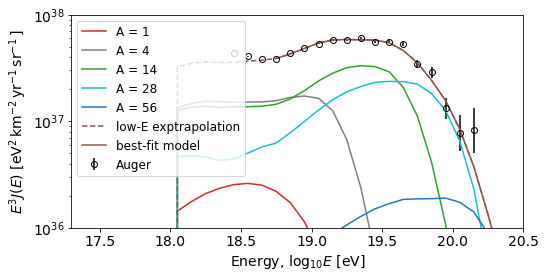

In [7]:
sp.Plot_spectrum(Tensor, E_times_k, ts.A, ts.Z, w_zR, E_th)


Composition deviance, from logE= 18.75 :  57.319810255622514  ( 20 )


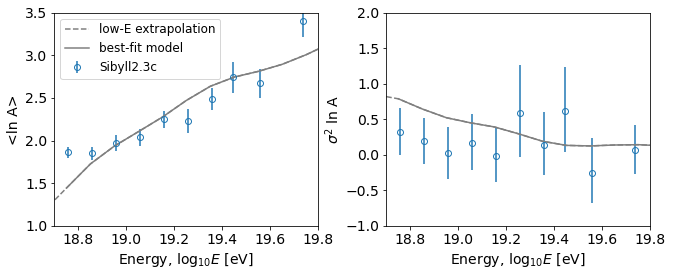

In [8]:
    mass.Plot_fractions(Tensor, E_times_k, ts.A, ts.Z, w_zR, E_th, model="Sibyll2.3c")


Composition deviance, from logE= 18.75 :  48.93836932780857 ( 18 )


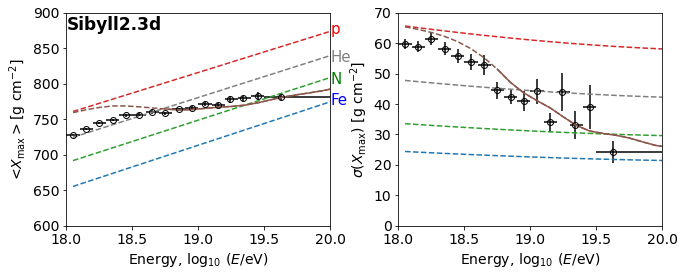

In [9]:
    mass.Plot_Xmax(Tensor,E_times_k,ts.A,ts.Z,w_zR,E_th, model = "Sibyll2.3d")
